In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline

In [9]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [11]:
X

array([[ -9.17644786,  -0.30494515],
       [ -4.08108481,  -3.27570173],
       [ -4.75420614,  -4.34085523],
       ...,
       [ -5.20240706,  -6.30372901],
       [-10.20463621,  -1.76435581],
       [-10.98387558,  -2.40507256]])

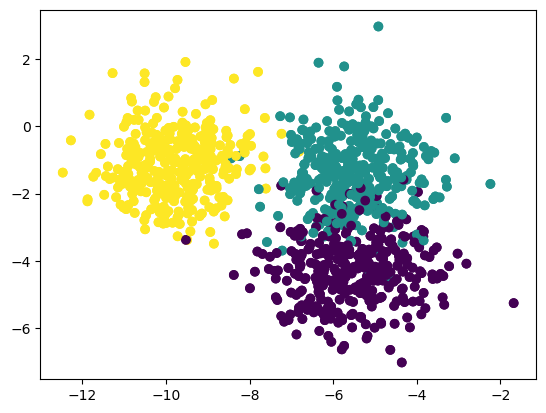

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [18]:
#Standarizarion
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [24]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [26]:
from sklearn.cluster import KMeans

In [28]:
#Elbow method to select the k value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [30]:
wcss

[1339.9999999999986,
 625.8423535602741,
 318.99050931073555,
 266.293397642654,
 217.678859130045,
 198.39084100433428,
 167.46435438325545,
 152.03677981773964,
 134.4384460921146,
 125.24300694985797]

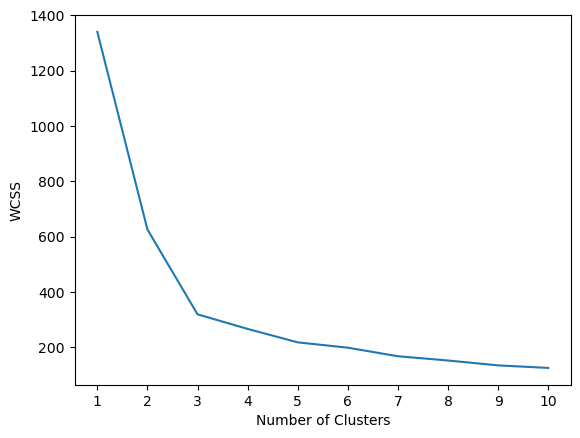

In [32]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [36]:
kmeans.fit_predict(X_train_scaled)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 0,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0,

In [38]:
y_pred = kmeans.predict(X_test_scaled)

In [40]:
y_pred

array([1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2,
       1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2,
       2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2,

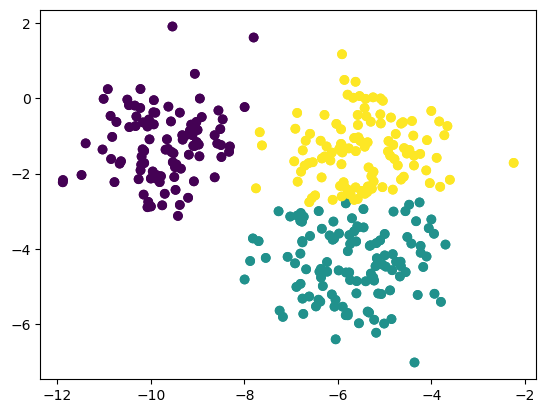

In [44]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred)
plt.show()

In [47]:
#Validating k value
#1)kneelacator
#2)silhoutee scoring


In [49]:
#1)kneelacator
!pip install kneed

In [51]:
from kneed import KneeLocator

In [53]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [55]:
kl.elbow

3

In [57]:
#2)silhoutee scoring
from sklearn.metrics import silhouette_score

In [73]:
import warnings
warnings.filterwarnings("ignore") 
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

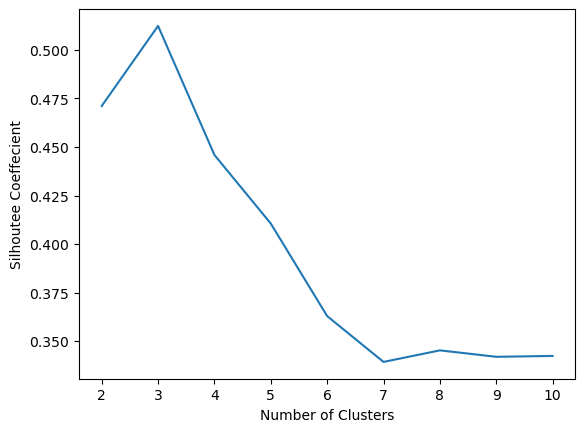

In [75]:
#plot
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutee Coeffecient")
plt.show()